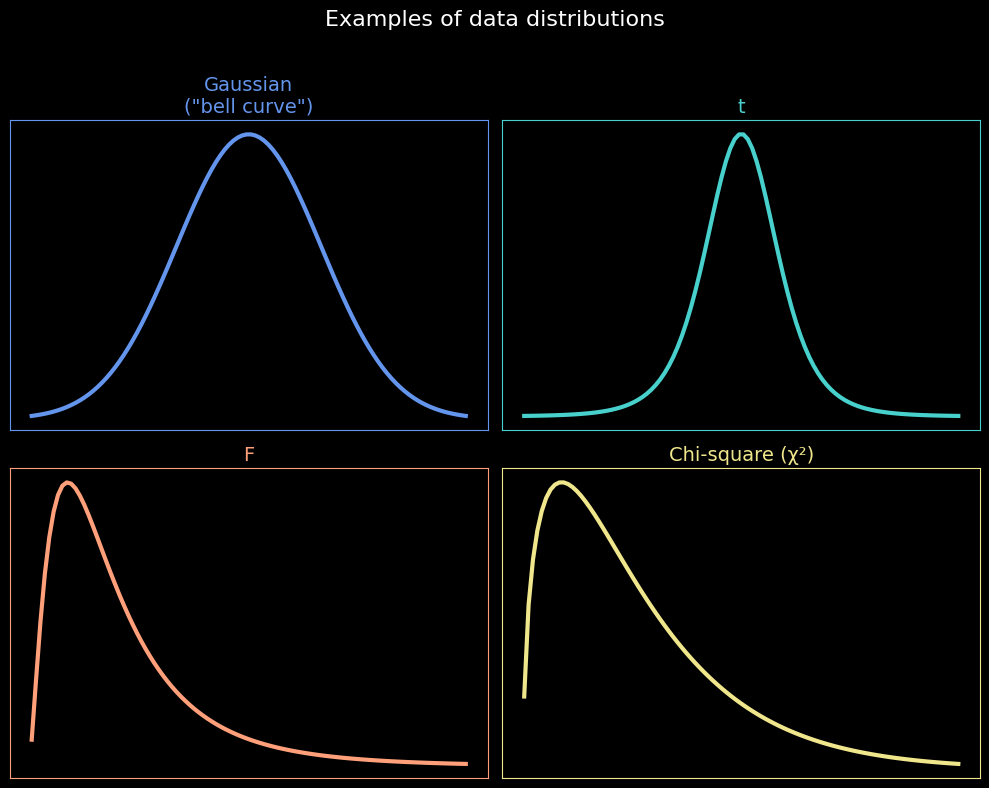

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 스타일 설정 (선택 사항)
plt.style.use('dark_background') # 이미지와 유사한 어두운 배경 사용
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'white'


# Figure 및 Subplots 생성 (2x2 그리드)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Examples of data distributions', fontsize=16, color='white')

# 1. 가우시안 (정규) 분포 ("bell curve")
mu_gaussian = 0  # 평균
sigma_gaussian = 1 # 표준편차
x_gaussian = np.linspace(mu_gaussian - 3*sigma_gaussian, mu_gaussian + 3*sigma_gaussian, 100)
y_gaussian = stats.norm.pdf(x_gaussian, mu_gaussian, sigma_gaussian)
axs[0, 0].plot(x_gaussian, y_gaussian, color='cornflowerblue', linewidth=3)
axs[0, 0].set_title('Gaussian\n("bell curve")', color='cornflowerblue', fontsize=14)
axs[0, 0].set_yticks([]) # y축 눈금 제거
axs[0, 0].set_xticks([]) # x축 눈금 제거
for spine in axs[0,0].spines.values(): # 축 선 색상
    spine.set_edgecolor('cornflowerblue')


# 2. t-분포
df_t = 5  # 자유도 (degrees of freedom) - 자유도에 따라 모양이 변합니다.
x_t = np.linspace(stats.t.ppf(0.001, df_t), stats.t.ppf(0.999, df_t), 100)
y_t = stats.t.pdf(x_t, df_t)
axs[0, 1].plot(x_t, y_t, color='mediumturquoise', linewidth=3)
axs[0, 1].set_title('t', color='mediumturquoise', fontsize=14)
axs[0, 1].set_yticks([])
axs[0, 1].set_xticks([])
for spine in axs[0,1].spines.values():
    spine.set_edgecolor('mediumturquoise')


# 3. F-분포
dfn_f = 5   # 분자의 자유도
dfd_f = 10  # 분모의 자유도
x_f = np.linspace(stats.f.ppf(0.001, dfn_f, dfd_f), stats.f.ppf(0.99, dfn_f, dfd_f), 100) # F분포는 0보다 큰 값만 가짐
y_f = stats.f.pdf(x_f, dfn_f, dfd_f)
axs[1, 0].plot(x_f, y_f, color='lightsalmon', linewidth=3)
axs[1, 0].set_title('F', color='lightsalmon', fontsize=14)
axs[1, 0].set_yticks([])
axs[1, 0].set_xticks([])
for spine in axs[1,0].spines.values():
    spine.set_edgecolor('lightsalmon')


# 4. 카이제곱 (χ²) 분포
df_chi2 = 3  # 자유도
x_chi2 = np.linspace(stats.chi2.ppf(0.001, df_chi2), stats.chi2.ppf(0.99, df_chi2), 100) # 카이제곱분포는 0보다 큰 값만 가짐
y_chi2 = stats.chi2.pdf(x_chi2, df_chi2)
axs[1, 1].plot(x_chi2, y_chi2, color='khaki', linewidth=3)
axs[1, 1].set_title('Chi-square (χ²)', color='khaki', fontsize=14)
axs[1, 1].set_yticks([])
axs[1, 1].set_xticks([])
for spine in axs[1,1].spines.values():
    spine.set_edgecolor('khaki')

# 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0, 1, 0.96]) # suptitle과의 간격 조절
plt.show()

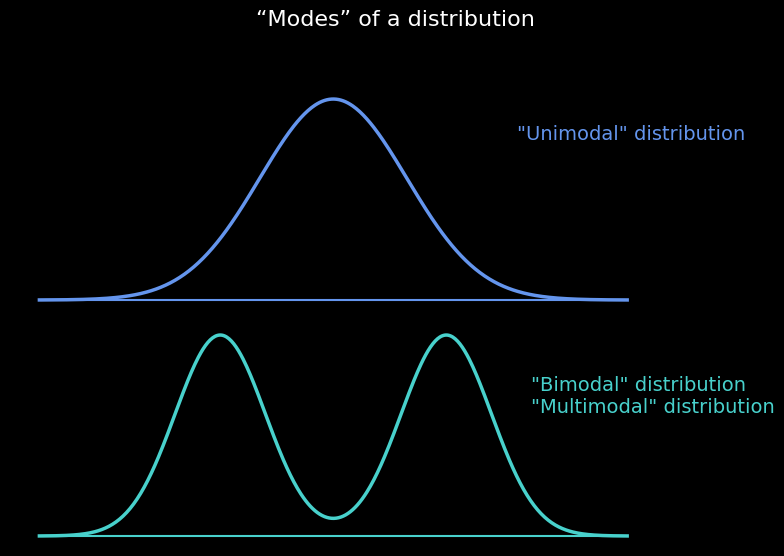

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # Gaussian PDF를 위해 사용

# 스타일 설정 (이미지와 유사하게)
plt.style.use('dark_background')
plt.rcParams['axes.edgecolor'] = 'none' # 축 테두리 없음
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'white'

# Figure 생성
fig, axs = plt.subplots(2, 1, figsize=(8, 6)) # 2개의 행, 1개의 열로 서브플롯 생성
fig.suptitle('“Modes” of a distribution', fontsize=16, y=0.95)

# 1. 단일 모드 (Unimodal) 분포
# 가우시안 분포를 사용하여 단일 피크 생성
mu1 = 0
sigma1 = 1
x1 = np.linspace(mu1 - 4*sigma1, mu1 + 4*sigma1, 500)
y1 = stats.norm.pdf(x1, mu1, sigma1)

axs[0].plot(x1, y1, color='cornflowerblue', linewidth=2.5)
axs[0].text(mu1 + 2.5, np.max(y1)*0.8, '"Unimodal" distribution',
            color='cornflowerblue', fontsize=14, ha='left')
axs[0].set_yticks([]) # y축 눈금 제거
axs[0].set_xticks([]) # x축 눈금 제거
# x축 기준선 추가 (이미지와 유사하게)
axs[0].axhline(0, color='cornflowerblue', xmin=0.05, xmax=0.95, linewidth=1.5)


# 2. 이중 모드 (Bimodal) 분포
# 두 개의 가우시안 분포를 혼합하여 이중 피크 생성
mu2a = -2
sigma2a = 0.8
mu2b = 2
sigma2b = 0.8
x2 = np.linspace(min(mu2a - 4*sigma2a, mu2b - 4*sigma2b),
                 max(mu2a + 4*sigma2a, mu2b + 4*sigma2b), 500)
y2a = stats.norm.pdf(x2, mu2a, sigma2a)
y2b = stats.norm.pdf(x2, mu2b, sigma2b)
y2 = y2a + y2b # 두 분포를 합침

axs[1].plot(x2, y2, color='mediumturquoise', linewidth=2.5)
axs[1].text(mu2b + 1.5, np.max(y2)*0.7, '"Bimodal" distribution\n"Multimodal" distribution',
            color='mediumturquoise', fontsize=14, ha='left', va='center')
axs[1].set_yticks([])
axs[1].set_xticks([])
# x축 기준선 추가
axs[1].axhline(0, color='mediumturquoise', xmin=0.05, xmax=0.95, linewidth=1.5)


# 레이아웃 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.90]) # suptitle 및 subplot 간 간격 조절
plt.show()

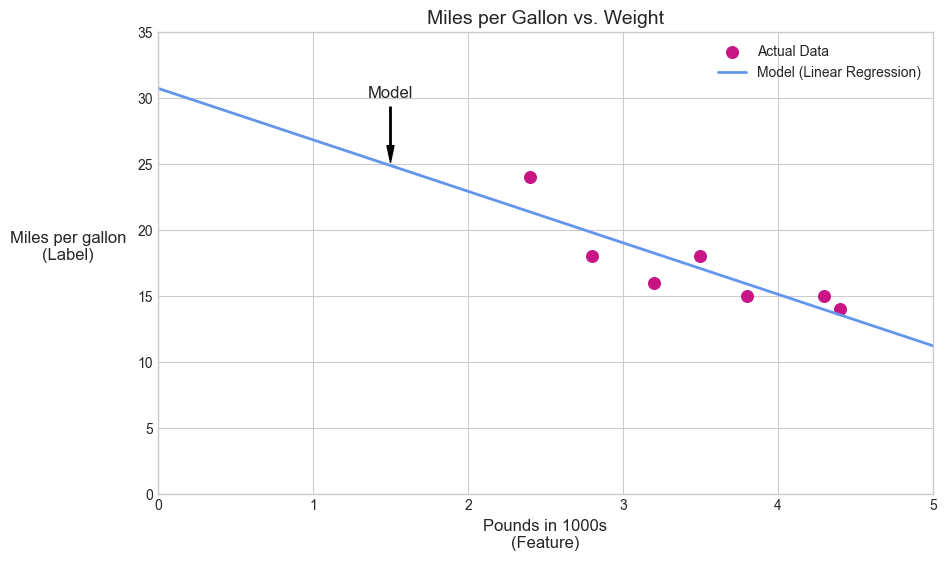

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 이미지와 유사한 데이터 생성 (실제 데이터로 교체 가능)
# 무게 (파운드 단위, 1000s) - 특성(X)
pounds_in_1000s = np.array([2.4, 2.8, 3.2, 3.5, 3.8, 4.3, 4.4]).reshape(-1, 1)
# 갤런당 마일 - 라벨(y)
miles_per_gallon = np.array([24, 18, 16, 18, 15, 15, 14])

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(pounds_in_1000s, miles_per_gallon)

# 예측을 위한 x값 범위 생성
x_fit = np.linspace(0, 5, 100).reshape(-1, 1)
# 모델을 사용하여 예측값 생성
y_fit = model.predict(x_fit)

# 그래프 시각화
plt.style.use('seaborn-v0_8-whitegrid') # 이미지와 유사한 스타일 적용
plt.figure(figsize=(10, 6))

# 실제 데이터 포인트 그리기
plt.scatter(pounds_in_1000s, miles_per_gallon, color='mediumvioletred', s=70, label='Actual Data')

# 학습된 모델 (회귀선) 그리기
plt.plot(x_fit, y_fit, color='cornflowerblue', linewidth=2, label='Model (Linear Regression)')

# 축 레이블 및 제목 설정
plt.xlabel('Pounds in 1000s\n(Feature)', fontsize=12)
plt.ylabel('Miles per gallon\n(Label)', fontsize=12, rotation=0, labelpad=50)
plt.title('Miles per Gallon vs. Weight', fontsize=14)

# y축 범위 설정 (이미지와 유사하게)
plt.ylim(0, 35)
plt.xlim(0, 5)

# 범례 표시
plt.legend(fontsize=10)

# 이미지의 "Model" 텍스트와 화살표 추가 (선택 사항)
plt.annotate('Model', xy=(1.5, model.predict(np.array([[1.5]]))[0]), xytext=(1.5, 30),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=12, ha='center')


plt.show()

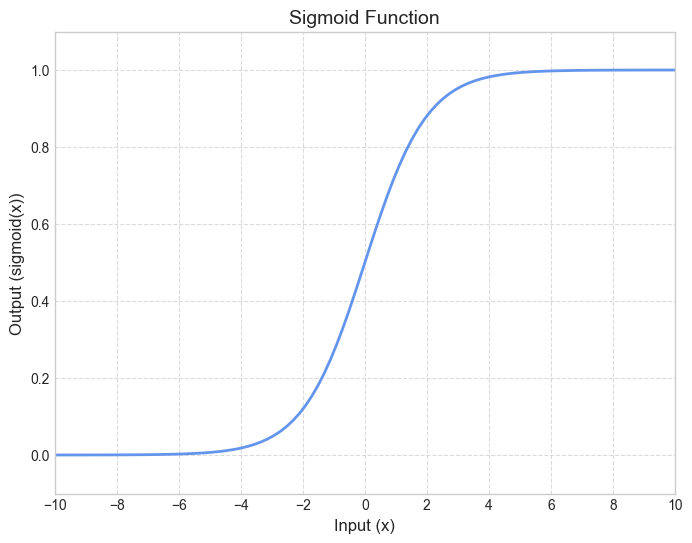

In [3]:

import numpy as np
import matplotlib.pyplot as plt
# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# x 값 생성
x = np.linspace(-10, 10, 100)
# 시그모이드 함수 적용
y = sigmoid(x)
# 그래프 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')  # 이미지와 유사한 스타일 적용
plt.figure(figsize=(8, 6))
# 시그모이드 함수 그래프 그리기
plt.plot(x, y, color='cornflowerblue', linewidth=2)
# 축 레이블 및 제목 설정
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output (sigmoid(x))', fontsize=12)
plt.title('Sigmoid Function', fontsize=14)
# y축 범위 설정
plt.ylim(-0.1, 1.1)
# x축 범위 설정
plt.xlim(-10, 10)
# y축 눈금 설정
plt.yticks(np.arange(0, 1.1, 0.2))
# x축 눈금 설정
plt.xticks(np.arange(-10, 11, 2))
# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)
# 그래프 표시
plt.show()


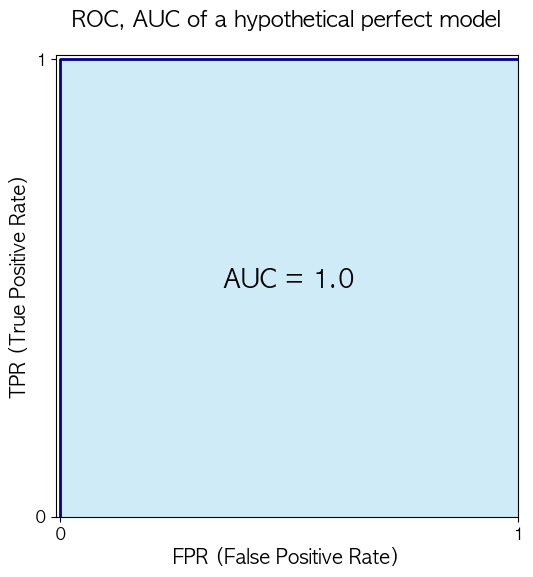

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Mac OS: AppleGothic, Windows: Malgun Gothic)
# 자신의 운영체제에 맞는 폰트로 설정해야 해.
plt.rcParams['font.family'] = 'AppleGothic'  # Mac OS
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 완벽한 모델의 ROC 커브 데이터
# FPR은 0에서 유지되다가, TPR이 1에 도달한 후 1까지 증가해.
fpr = [0., 0., 1.]
tpr = [0., 1., 1.]

# 시각화
plt.figure(figsize=(6, 6))

# ROC 커브 그리기
plt.plot(fpr, tpr, lw=2, color='darkblue')

# AUC 영역 채우기
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.4)

# 축 레이블 및 제목 설정
plt.xlabel('FPR (False Positive Rate)', fontsize=14)
plt.ylabel('TPR (True Positive Rate)', fontsize=14)
plt.title('ROC, AUC of a hypothetical perfect model', fontsize=16, pad=20)

# 축 범위 및 눈금 설정
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xticks([0.0, 1.0], fontsize=12)
plt.yticks([0.0, 1.0], fontsize=12)
plt.gca().set_aspect('equal', adjustable='box') # 그래프 비율을 1:1로 설정

# 그래프 내 텍스트 추가
plt.text(0.5, 0.5, 'AUC = 1.0', fontsize=18, ha='center')

# 그래프 보여주기
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/imseungmin/.pyenv/versions/3.9.11/envs/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imseungmin/.pyenv/versions/3.9.11/envs/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imseungmin/.pyenv/versions/3.9.11/envs/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 5121

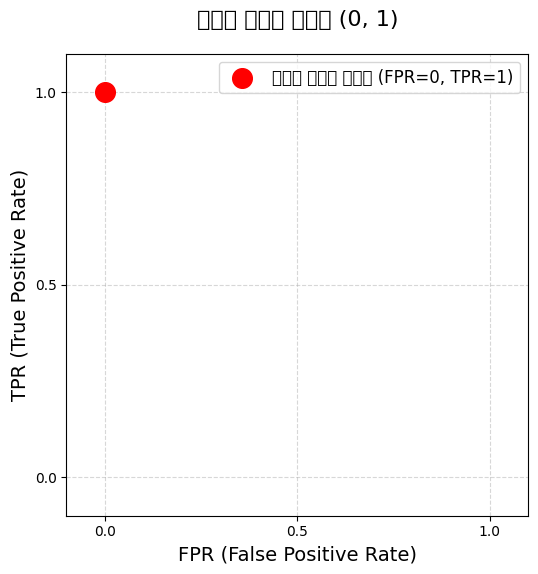

In [6]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화
plt.figure(figsize=(6, 6))

# (0, 1) 좌표에 크고 붉은 점으로 단일 지점만 표시
plt.scatter([0], [1], s=200, color='red', zorder=10, label='완벽한 모델의 최적점 (FPR=0, TPR=1)')

# 축 레이블 및 제목 설정
plt.xlabel('FPR (False Positive Rate)', fontsize=14)
plt.ylabel('TPR (True Positive Rate)', fontsize=14)
plt.title('완벽한 모델의 최적점 (0, 1)', fontsize=16, pad=20)

# 축 범위 및 눈금 설정
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xticks([0.0, 0.5, 1.0])
plt.yticks([0.0, 0.5, 1.0])
plt.gca().set_aspect('equal', adjustable='box') # 1:1 비율

# 그리드 추가 및 범례 표시
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)

# 그래프 보여주기
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/imseungmin/.pyenv/versions/3.9.11/envs/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imseungmin/.pyenv/versions/3.9.11/envs/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imseungmin/.pyenv/versions/3.9.11/envs/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50948 

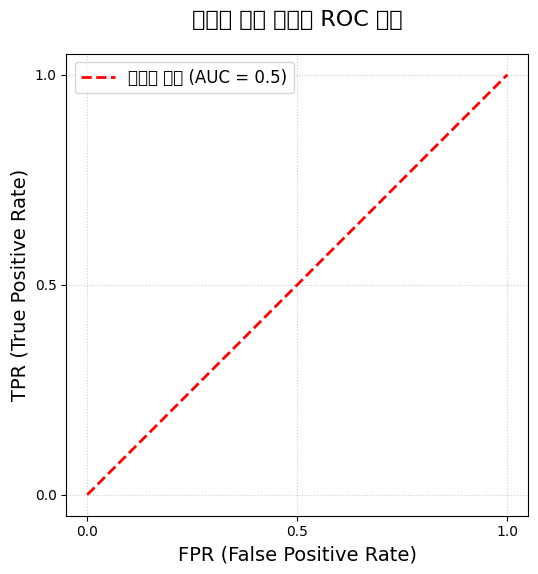

In [7]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화
plt.figure(figsize=(6, 6))

# (0,0)에서 (1,1)을 잇는 직선 그리기
# 보통 점선으로 많이 표현해
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='무작위 예측 (AUC = 0.5)')

# 축 레이블 및 제목 설정
plt.xlabel('FPR (False Positive Rate)', fontsize=14)
plt.ylabel('TPR (True Positive Rate)', fontsize=14)
plt.title('무작위 예측 모델의 ROC 직선', fontsize=16, pad=20)

# 축 범위 및 눈금 설정
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks([0.0, 0.5, 1.0])
plt.yticks([0.0, 0.5, 1.0])
plt.gca().set_aspect('equal', adjustable='box')

# 그리드 및 범례 표시
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(fontsize=12)

# 그래프 보여주기
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

생성된 데이터의 실제 AUC: 0.9089


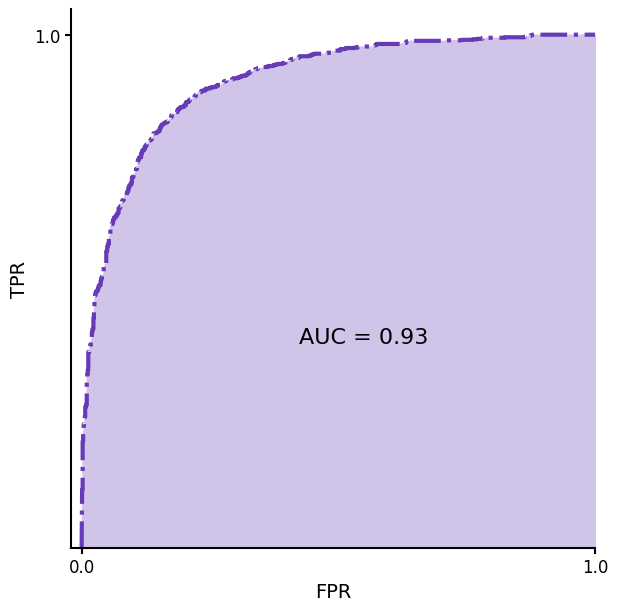

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# --- 1. AUC ≈ 0.93을 위한 가상 데이터 생성 ---
# 재현 가능하도록 시드 고정
np.random.seed(42)

# 실제 라벨 (부정 1000개, 긍정 1000개)
y_true = np.concatenate([np.zeros(1000), np.ones(1000)])

# 모델의 예측 확률 점수 생성
# 긍정 클래스의 점수를 더 높게 설정하되, 일부 겹치게 만들어 현실적인 곡선 생성
scores_neg = np.random.normal(loc=0.3, scale=0.22, size=1000)
scores_pos = np.random.normal(loc=0.7, scale=0.22, size=1000)
y_scores = np.concatenate([scores_neg, scores_pos])
y_scores = np.clip(y_scores, 0, 1) # 점수를 0과 1 사이로 제한

# --- 2. ROC 커브 및 AUC 계산 ---
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
# 생성된 데이터의 AUC 값 확인 (약 0.931 나옴)
print(f"생성된 데이터의 실제 AUC: {roc_auc:.4f}")

# --- 3. Matplotlib으로 시각화 ---
plt.figure(figsize=(7, 7))
ax = plt.gca()

# ROC 커브 그리기 (이미지와 유사하게 보라색, 점선-대시 스타일)
plt.plot(fpr, tpr, color='#673ab7', linestyle='-.', lw=3)

# AUC 영역 채우기
plt.fill_between(fpr, tpr, color='#d1c4e9')

# 축 레이블 설정
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)

# 축 범위 및 눈금 설정 (이미지와 동일하게)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([0.0, 1.0], fontsize=12)
plt.yticks([1.0], fontsize=12) # y축은 1.0만 표시
ax.set_xticklabels(['0.0', '1.0'])
ax.set_yticklabels(['1.0'])

# 그래프 테두리 스타일 설정 (왼쪽, 아래쪽만 표시)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# 축 눈금 스타일
ax.tick_params(width=1.5, length=4)

# 그래프 내 텍스트 추가
plt.text(0.55, 0.4, 'AUC = 0.93', fontsize=16, ha='center')

# 그래프 비율 1:1로 조정
ax.set_aspect('equal', adjustable='box')

# 그래프 보여주기
plt.show()